<h3>Techniques for the efficient application of machine learning models</h3>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h5>Evaluating a Learning Algorithm (Polynomial Regression)</h5>

In [44]:
def generate_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
    x_ideal = x_train 
    return x_train, y_train, x_ideal, y_ideal

X_, Y_, X, Y = generate_data(m=18, seed=2, scale=0.7)

print(X_.shape)
print(Y_.shape)
print(X.shape)
print(Y.shape)

(18,)
(18,)
(18,)
(18,)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12,)
(12,)
(6,)
(6,)


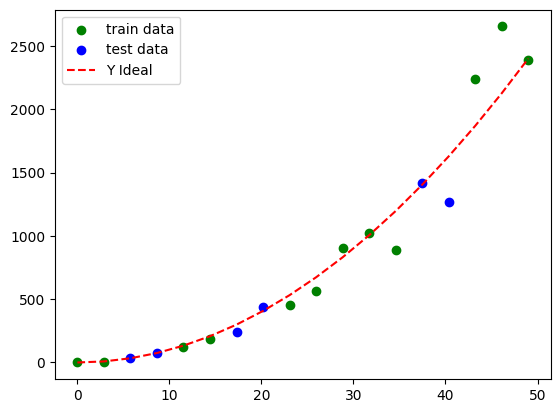

In [46]:
plt.scatter(X_train, Y_train, label="train data", color="green")
plt.scatter(X_test, Y_test, label="test data", color="blue")
plt.plot(X, Y, label="Y Ideal", linestyle="--", color="red")
plt.legend()
plt.show()

In [47]:
class lin_model:
    def __init__(self, degree, regularization = False, lambda_=0):
        if regularization:
            self.linear_model = Ridge(alpha=lambda_)
        else:
            self.linear_model = LinearRegression()
        self.poly = PolynomialFeatures(degree, include_bias=False)
        self.scaler = StandardScaler()
        
    def fit(self, X_train,y_train):
        ''' just fits the data. mapping and scaling are not repeated '''
        X_train_mapped = self.poly.fit_transform(X_train.reshape(-1,1))
        X_train_mapped_scaled = self.scaler.fit_transform(X_train_mapped)
        self.linear_model.fit(X_train_mapped_scaled, y_train )

    def predict(self, X):
        X_mapped = self.poly.transform(X.reshape(-1,1))
        X_mapped_scaled = self.scaler.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return(yhat)
    
    def mse(self, y, yhat):
        err = mean_squared_error(y,yhat)/2 
        return (err)

In [48]:
degree = 10
model = lin_model(degree)
model.fit(X_train, Y_train)


yhat = model.predict(X_train)
err_train = model.mse(Y_train, yhat)

yhat1 = model.predict(X_test)
err_test = model.mse(Y_test, yhat1)

print(err_train)
print(err_test)

58.007560352786506
171215.01148835945


In [49]:
x = np.linspace(0,int(X.max()),100) 
y_pred = model.predict(x).reshape(-1,1)

print(x.shape)
print(y_pred.shape)

(100,)
(100, 1)


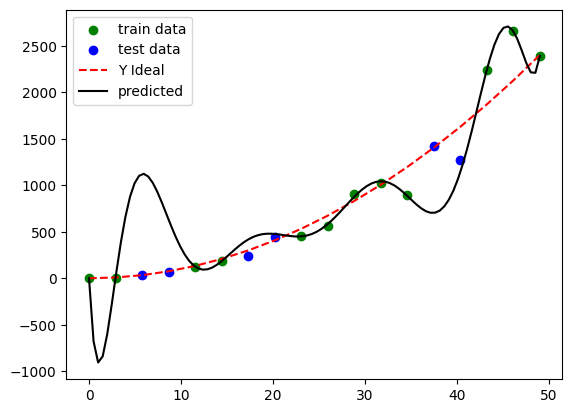

In [50]:
plt.scatter(X_train, Y_train, label="train data", color="green")
plt.scatter(X_test, Y_test, label="test data", color="blue")
plt.plot(X, Y, label="Y Ideal", linestyle="--", color="red")
plt.plot(x, y_pred, label="predicted", color="black")
plt.legend()
plt.show()

In [62]:
X_, Y_, X, Y = generate_data(40, 5, 0.7)
print(X_.shape)
print(Y_.shape)
print(X.shape)
print(Y.shape)

(40,)
(40,)
(40,)
(40,)


In [63]:
X_train, X_tcv, Y_train, Y_tcv = train_test_split(X_,Y_,test_size=0.40, random_state=1)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_tcv,Y_tcv,test_size=0.50, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

(24,)
(24,)
(8,)
(8,)
(8,)
(8,)


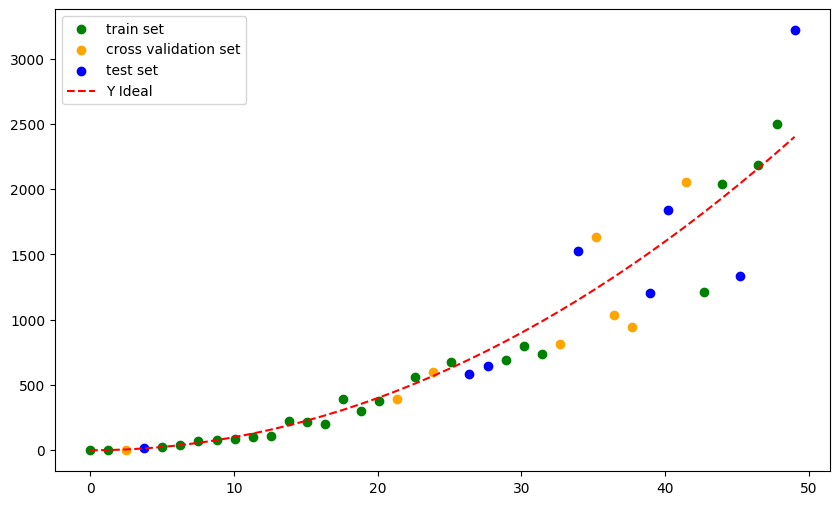

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label="train set", color="green")
plt.scatter(X_cv, Y_cv, label="cross validation set", color="orange")
plt.scatter(X_test, Y_test, label="test set", color="blue")
plt.plot(X, Y, label="Y Ideal", linestyle="--", color="red")
plt.legend()
plt.show()

In [65]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, Y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(Y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(Y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

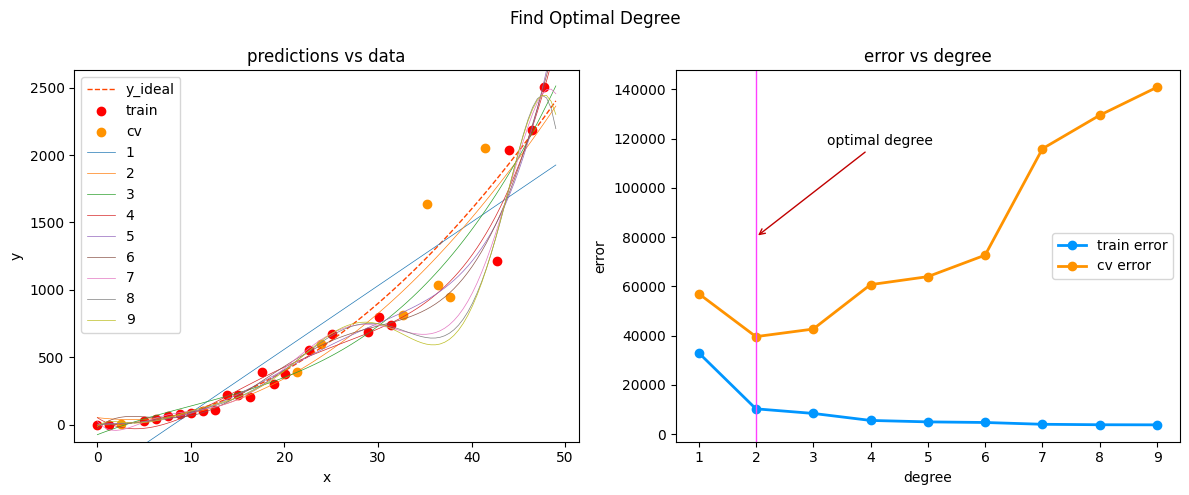

In [71]:
def plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax[0].set_title("predictions vs data",fontsize = 12)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")

    ax[0].plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
    ax[0].scatter(X_train, y_train, color = "red",           label="train")
    ax[0].scatter(X_cv, y_cv,       color ='#FF9300', label="cv")
    ax[0].set_xlim(ax[0].get_xlim())
    ax[0].set_ylim(ax[0].get_ylim())
    for i in range(0,max_degree):
        ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"{i+1}")
    ax[0].legend(loc='upper left')

    ax[1].set_title("error vs degree",fontsize = 12)
    cpts = list(range(1, max_degree+1))
    ax[1].plot(cpts, err_train[0:], marker='o',label="train error", lw=2,  color ='#0096ff')
    ax[1].plot(cpts, err_cv[0:],    marker='o',label="cv error",  lw=2, color ='#FF9300')
    ax[1].set_ylim(*ax[1].get_ylim())
    ax[1].axvline(optimal_degree, lw=1, color ='#FF40FF')
    ax[1].annotate("optimal degree", xy=(optimal_degree,80000),xycoords='data',
                xytext=(0.3, 0.8), textcoords='axes fraction', fontsize=10,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3", 
                                   color='#C00000', lw=1))
    ax[1].set_xlabel("degree")
    ax[1].set_ylabel("error")
    ax[1].legend()
    fig.suptitle("Find Optimal Degree",fontsize = 12)
    plt.tight_layout()

    plt.show()
    
    
plt.close("all")
plt_optimal_degree(X_train, Y_train, X_cv, Y_cv, x, y_pred, X, Y, 
                   err_train, err_cv, optimal_degree, max_degree)